In [1]:
#important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
#reading dataset
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv")
df.head(30)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [3]:
#checking size of dataset
df.shape

(614, 13)

In [4]:
#replacing alphabatical value into binary
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()
df2=lab_enc.fit_transform(df["Gender"])
pd.Series(df2)

0      1
1      1
2      1
3      1
4      1
      ..
609    0
610    1
611    1
612    1
613    0
Length: 614, dtype: int32

In [5]:
#checking converted or not
df["Gender"]=df2
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,1,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,1,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,1,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,1,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,1,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,1,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,1,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [6]:
#replacing alphabatical value into binary
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()
df2=lab_enc.fit_transform(df["Married"])
pd.Series(df2)

0      0
1      1
2      1
3      1
4      0
      ..
609    0
610    1
611    1
612    1
613    0
Length: 614, dtype: int32

In [7]:
#checking converted or not
df["Married"]=df2
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,1,1,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,1,1,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,1,1,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,1,0,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,1,1,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,1,1,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,1,1,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [8]:
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()
df2=lab_enc.fit_transform(df["Education"])
pd.Series(df2)

0      0
1      0
2      0
3      1
4      0
      ..
609    0
610    0
611    0
612    0
613    0
Length: 614, dtype: int32

In [9]:
df["Education"]=df2
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,1,1,1,0,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,1,1,0,0,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,1,1,0,1,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,1,0,0,0,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,1,1,3+,0,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,1,1,1,0,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,1,1,2,0,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [10]:
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()
df2=lab_enc.fit_transform(df["Self_Employed"])
pd.Series(df2)

0      0
1      0
2      1
3      0
4      0
      ..
609    0
610    0
611    0
612    0
613    1
Length: 614, dtype: int32

In [11]:
df["Self_Employed"]=df2
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,1,1,3+,0,0,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,Urban,Y


In [12]:
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()
df2=lab_enc.fit_transform(df["Property_Area"])
pd.Series(df2)

0      2
1      0
2      2
3      2
4      2
      ..
609    0
610    0
611    2
612    2
613    1
Length: 614, dtype: int32

In [13]:
df["Property_Area"]=df2
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,NaN,360.0,1.0,2,Y
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,N
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,Y
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,Y
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,Y
610,LP002979,1,1,3+,0,0,4106,0.0,40.0,180.0,1.0,0,Y
611,LP002983,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,Y
612,LP002984,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,Y


In [14]:
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()
df2=lab_enc.fit_transform(df["Loan_Status"])
pd.Series(df2)

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Length: 614, dtype: int32

In [15]:
df["Loan_Status"]=df2
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,NaN,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,LP002979,1,1,3+,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,LP002983,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,LP002984,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [16]:
#checking null values
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [17]:
df.describe()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,592.000000,600.00000,564.000000,614.000000,614.000000
mean,0.838762,0.657980,0.218241,0.237785,5403.459283,1621.245798,146.412162,342.00000,0.842199,1.037459,0.687296
std,0.421752,0.484971,0.413389,0.534737,6109.041673,2926.248369,85.587325,65.12041,0.364878,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.00000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.000000,360.00000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,3812.500000,1188.500000,128.000000,360.00000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,168.000000,360.00000,1.000000,2.000000,1.000000
max,2.000000,2.000000,1.000000,2.000000,81000.000000,41667.000000,700.000000,480.00000,1.000000,2.000000,1.000000


In [18]:
#filling null values
df['LoanAmount']=df["LoanAmount"].fillna(df["LoanAmount"].mean())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mean())

In [19]:
#verify if nan's are filled
df.describe()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.838762,0.657980,0.218241,0.237785,5403.459283,1621.245798,146.412162,342.000000,0.842199,1.037459,0.687296
std,0.421752,0.484971,0.413389,0.534737,6109.041673,2926.248369,84.037468,64.372489,0.349681,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,2.000000,2.000000,1.000000,2.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


In [20]:
#removing id column
df.drop("Loan_ID",axis=1,inplace=True)

In [21]:
df.shape

(614, 12)

In [24]:
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()
df2=lab_enc.fit_transform(df["Dependents"])
pd.Series(df2)

0      0
1      1
2      0
3      0
4      0
      ..
609    0
610    3
611    1
612    2
613    0
Length: 614, dtype: int32

In [29]:
df["Dependents"]=df2
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


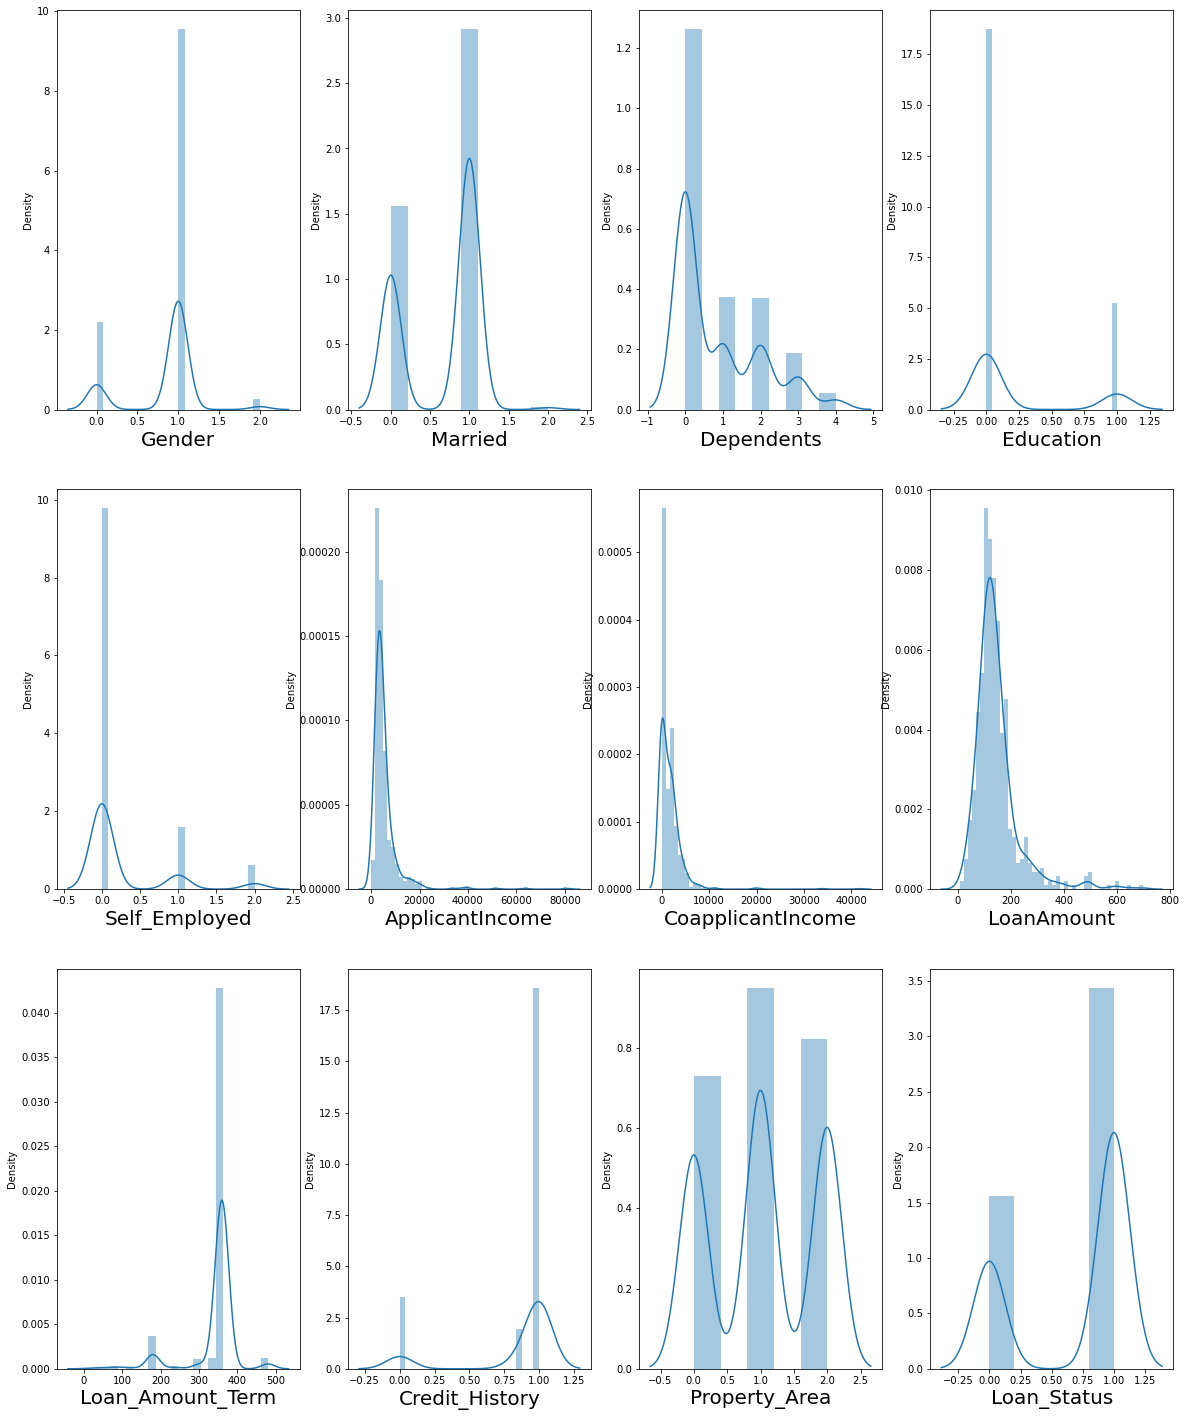

In [30]:
plt.figure(figsize=(20,25))
plotnumber=1
for column in df:
    if plotnumber<=12:
        ax=plt.subplot(3,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [32]:
#dividing dataset into features & Label
y=df["Loan_Status"]
x=df.drop(columns=["Loan_Status"])
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int32

In [33]:
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2


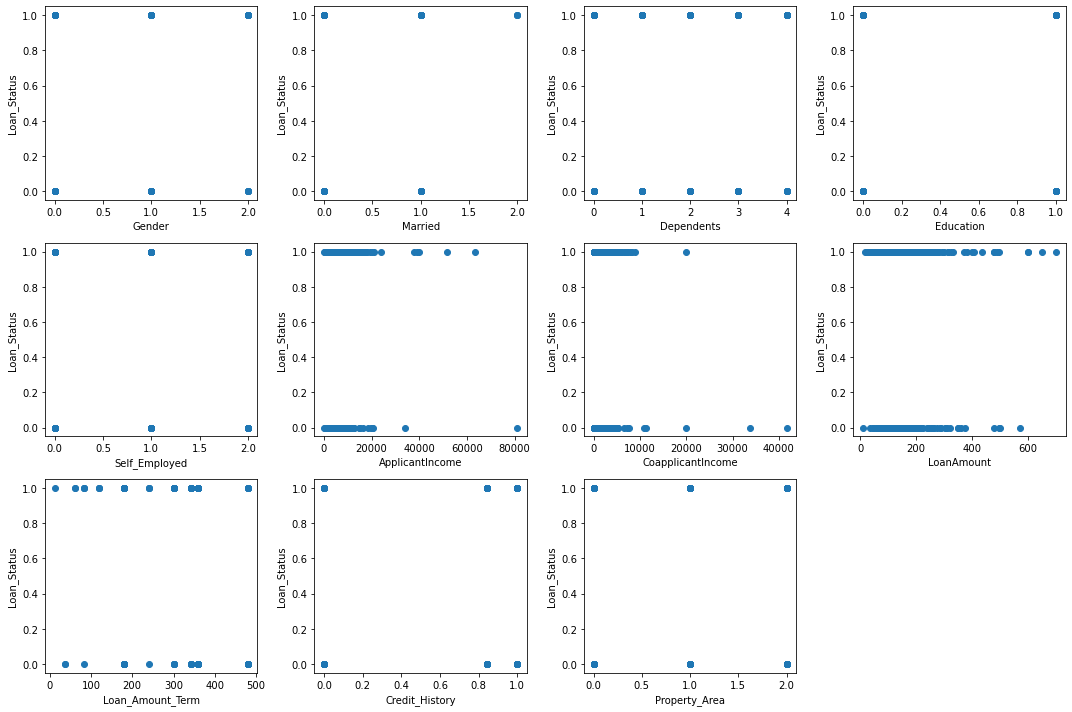

In [34]:
#visualizing relationship
plt.figure(figsize=(15,10))
plotnumber=1
for column in x:
    if plotnumber<=11:
        ax=plt.subplot(3,4,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=10)
        plt.ylabel('Loan_Status',fontsize=10)
    plotnumber+=1
plt.tight_layout()

In [35]:
#find the IQR to identify outliers
#1st quantile
q1=df.quantile(0.25)
#3rd quantile
q3=df.quantile(0.75)
#IQR
iqr=q3-q1

In [ ]:
#outlier detection formula
